In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!nvidia-smi

Sun Apr 21 14:57:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%cd /content/gdrive/MyDrive/Classroom/yolov5

/content/gdrive/MyDrive/Classroom/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 16562, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 16562 (delta 20), reused 30 (delta 13), pack-reused 16522
Receiving objects: 100% (16562/16562), 15.08 MiB | 9.59 MiB/s, done.
Resolving deltas: 100% (11377/11377), done.
/content/gdrive/MyDrive/Classroom/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.3.0 which is incompatible.
     ━━━━━━━━━━━

In [ ]:
%cd /content/gdrive/MyDrive/Classroom/yolov5

/content/gdrive/MyDrive/Classroom/yolov5


In [ ]:
!python train.py --img 608 --batch 16 --epoch 100 --data /content/gdrive/MyDrive/Classroom/yolov5/data/data.yaml --weights yolov5s.pt --cache

2024-04-21 15:01:49.760690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 15:01:49.760741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 15:01:49.762146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/gdrive/MyDrive/Classroom/yolov5/data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=608, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, devic

detect: weights=['/content/gdrive/MyDrive/Classroom/yolov5/runs/train/exp/weights/best.pt'], source=/content/1-22.jpg, data=data/coco128.yaml, imgsz=[608, 608], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/1-22.jpg: 416x608 32 Black-Spots, 3 Downy-Mildews, 72.8ms
Speed: 0.5ms pre-process, 72.8ms inference, 470.6ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp3


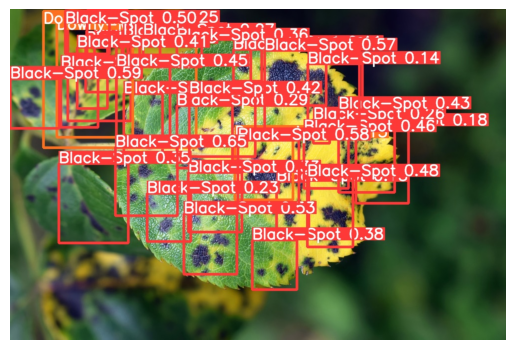

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/Classroom/yolov5/runs/train/exp/weights/best.pt --img 608 --conf 0.1 --source /content/1-22.jpg

import cv2
from matplotlib import pyplot as plt
# Load the image (replace "path/to/your/image.jpg" with your actual image path)
img = cv2.imread("/content/gdrive/MyDrive/Classroom/yolov5/runs/detect/exp3/1-22.jpg")

# Check if image loaded successfully
if img is None:
  print("Error: Image not found or unable to load.")
else:
  # Convert BGR (OpenCV format) to RGB (Matplotlib format)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image
  plt.imshow(rgb_img)
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()

In [ ]:
!python export.py --weights runs/train/exp/weights/best.pt --include tflite --img 416

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-304-g22361691 Python-3.10.12 torch-2.2.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 10647, 13) (13.8 MB)
2024-04-23 03:43:03.822182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 03:43:03.822247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register 

# **FracAtlas**

In [ ]:
!python train.py --img 608 --batch 16 --epoch 100 --data /content/yolov5/data/custom.yaml --weights yolov5s.pt --cache

2024-03-01 03:22:34.766011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 03:22:34.766061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 03:22:34.767401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=600, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, 

In [ ]:
!scp -r /content/yolov5/runs '/content/gdrive/My Drive/data'

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/data/runs/train/exp/weights/best.pt --img 608 --conf 0.1 --source /content/IMG0000019.jpg

detect: weights=['/content/gdrive/MyDrive/data/runs/train/exp/weights/best.pt'], source=/content/IMG0000019.jpg, data=data/coco128.yaml, imgsz=[608, 608], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/IMG0000019.jpg: 608x512 1 fractured, 503.7ms
Speed: 3.7ms pre-process, 503.7ms inference, 32.0ms NMS per image at shape (1, 3, 608, 608)
Results saved to runs/detect/exp


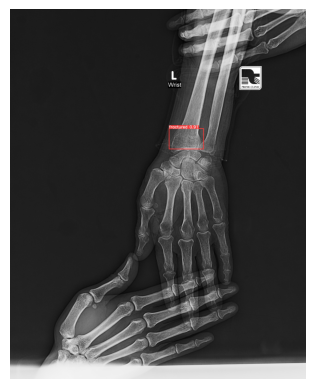

In [ ]:
# Import libraries
import cv2
from matplotlib import pyplot as plt

# Load the image (replace "path/to/your/image.jpg" with your actual image path)
img = cv2.imread("/content/yolov5/runs/detect/exp/IMG0000019.jpg")

# Check if image loaded successfully
if img is None:
  print("Error: Image not found or unable to load.")
else:
  # Convert BGR (OpenCV format) to RGB (Matplotlib format)
  rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image
  plt.imshow(rgb_img)
  plt.axis('off')  # Hide axes for cleaner display
  plt.show()
